<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Dog_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 29.6 MB/s 
     |████████████████████████████████| 48 kB 6.8 MB/s 
     |████████████████████████████████| 187 kB 65.6 MB/s 
     |████████████████████████████████| 1.2 MB 60.1 MB/s 
     |████████████████████████████████| 55 kB 5.0 MB/s 
     |████████████████████████████████| 561 kB 62.6 MB/s 
     |████████████████████████████████| 51 kB 413 kB/s 
     |████████████████████████████████| 130 kB 70.0 MB/s 


In [2]:
import fastbook

In [3]:
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
!pip install utils

In [5]:
from fastai.vision.all import *
from utils import *

In [6]:
path = untar_data(URLs.PETS)

In [7]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [8]:
images = (path/'images').ls()

In [9]:
images

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_242.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_115.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_100.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_132.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_47.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_73.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_10.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_106.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_185.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_65.jpg')...]

In [10]:
fnname = images[0]

In [11]:
fnname

Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_242.jpg')

In [12]:
file = (path/'images').ls()

In [13]:
fname = file[0]

In [14]:
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_242.jpg')

In [15]:
#re.findall(r'(.+)_\d+.jpg$', fname)

In [16]:
pets = DataBlock(blocks = (ImageBlock,CategoryBlock),
                 get_items =get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller("(.+)_\d+.jpg$"), "name"),
                 item_tfms=Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale=0.75),
                 )
dls = pets.dataloaders(path/'images')

Presizing is a way of doing image augmentation that is designed to minimize data destruction while maintaining good performance

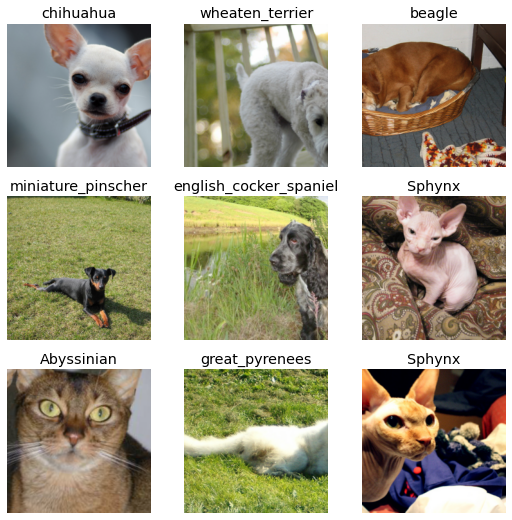

In [17]:
dls.show_batch()

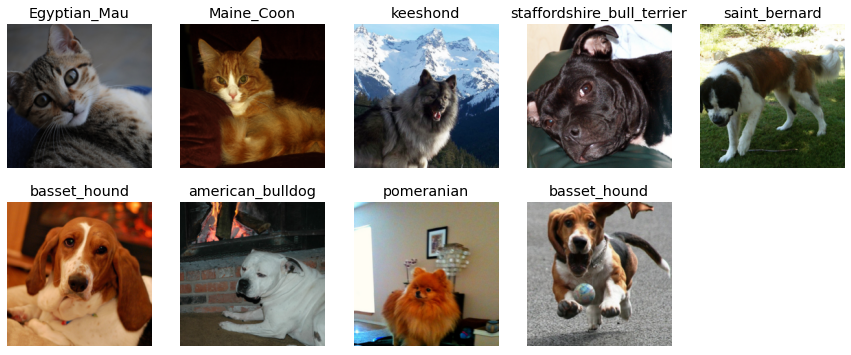

In [18]:
dls.show_batch(nrows=2, ncols =5)

In [19]:
pet1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42), 
                 get_y = using_attr(RegexLabeller("(.+)_\d+.jpg$"), "name"),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls = pet1.dataloaders(path/"images")

In [20]:
#We use a summary method
pet1.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/boxer_12.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/boxer_12.jpg
    applying partial gives
      boxer
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(16)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(16))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Res

In [21]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.509595,0.339227,0.116373,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.538371,0.327409,0.107578,01:14
1,0.325616,0.239561,0.071719,01:15


In [22]:
x,y = dls.one_batch()

In [ ]:
x

In [24]:
y

TensorCategory([ 9, 10, 19,  0, 18, 16, 20, 22,  9, 31, 18, 11, 19, 10, 32, 10, 27, 26, 32,  7, 25, 32, 30, 34, 34,  6, 15, 18, 19,  2,  0, 27, 32, 26, 18, 26, 11, 26, 10, 28, 19, 10, 15,  0, 12, 24, 29,  1,
        32, 16, 32, 32, 35, 18,  7, 10, 33,  3, 29, 31, 30, 23, 22, 21], device='cuda:0')

In [25]:
len(y)

64

In [26]:
pred,_ = learn.get_preds(dl =[(x,y)])
pred[0]

TensorBase([1.7477e-05, 2.8080e-07, 1.3652e-07, 5.3202e-05, 3.4144e-03, 8.9052e-06, 4.3548e-06, 3.2031e-07, 2.7178e-07, 9.9648e-01, 1.2305e-07, 5.8207e-07, 6.9746e-07, 4.6230e-07, 2.8871e-07, 6.5635e-08,
        4.3259e-07, 4.5242e-09, 4.1544e-07, 4.3815e-09, 1.5242e-06, 5.0431e-08, 9.8769e-08, 1.4674e-07, 3.3485e-06, 1.2093e-07, 5.1489e-07, 3.0364e-07, 3.2866e-07, 3.4263e-06, 7.6000e-09, 2.4380e-07,
        6.4567e-08, 1.2371e-06, 2.4357e-06, 4.0317e-08, 7.2900e-08])

In [27]:
len(pred[0])

37

In [28]:
pred[0].sum()

TensorBase(1.)

In [31]:
x,y = dls.one_batch()

In [ ]:
x

In [33]:
#The dependent variable is Y which is he labeled data 
y

TensorCategory([11,  6,  4, 24,  6, 35, 12, 32, 34, 15, 35, 25,  1,  5, 15,  9, 16, 26, 13, 20,  0, 27, 21, 34, 36, 25, 19, 27, 13,  5, 18, 30, 34, 18, 15, 33,  6, 11,  3, 13, 13, 19, 29, 24, 17, 31,  1,  9,
        25, 27, 12, 12, 29,  2, 17, 23,  5, 13, 20, 16,  2,  8, 24, 14], device='cuda:0')

In [34]:
len(y)

64

In [37]:
learn.get_preds()

(TensorBase([[5.1268e-05, 1.0887e-03, 4.4628e-04,  ..., 8.5906e-03, 1.3857e-04, 1.3929e-03],
         [1.6732e-08, 2.3109e-07, 1.2901e-08,  ..., 2.7325e-08, 9.3503e-07, 6.7156e-05],
         [4.4402e-09, 5.7650e-09, 6.6325e-08,  ..., 6.5152e-10, 2.9809e-08, 9.9993e-01],
         ...,
         [1.6801e-05, 6.3430e-05, 7.5379e-05,  ..., 2.3996e-03, 1.4550e-04, 8.8177e-06],
         [4.4881e-07, 2.6098e-05, 1.8710e-06,  ..., 9.7853e-01, 1.2156e-06, 4.0758e-06],
         [8.5312e-05, 3.1688e-06, 3.1267e-04,  ..., 3.0300e-06, 5.4905e-06, 5.3288e-07]]),
 TensorCategory([15, 22, 36,  ..., 12, 34, 10]))

In [46]:
preds,_ = learn.get_preds()

In [47]:
preds

TensorBase([[5.1268e-05, 1.0887e-03, 4.4628e-04,  ..., 8.5906e-03, 1.3857e-04, 1.3929e-03],
        [1.6732e-08, 2.3109e-07, 1.2901e-08,  ..., 2.7325e-08, 9.3503e-07, 6.7156e-05],
        [4.4402e-09, 5.7650e-09, 6.6325e-08,  ..., 6.5152e-10, 2.9809e-08, 9.9993e-01],
        ...,
        [1.6801e-05, 6.3430e-05, 7.5379e-05,  ..., 2.3996e-03, 1.4550e-04, 8.8177e-06],
        [4.4881e-07, 2.6098e-05, 1.8710e-06,  ..., 9.7853e-01, 1.2156e-06, 4.0758e-06],
        [8.5312e-05, 3.1688e-06, 3.1267e-04,  ..., 3.0300e-06, 5.4905e-06, 5.3288e-07]])

In [42]:
preds[1][0]

TensorBase(1.6732e-08)

In [43]:
sum = preds.sum()

In [48]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.0000))

In [50]:
acts = torch.randn((6,2)) * 2

In [52]:
acts

tensor([[ 1.1777,  2.5570],
        [-1.6045, -3.3076],
        [ 2.2148, -2.0914],
        [-0.8381, -4.8215],
        [-2.7693,  3.2209],
        [-1.9873, -1.8528]])

In [55]:
sum = acts.sigmoid()

In [58]:
sum

tensor([[0.7645, 0.9280],
        [0.1674, 0.0353],
        [0.9016, 0.1099],
        [0.3019, 0.0080],
        [0.0590, 0.9616],
        [0.1205, 0.1355]])

In [64]:
(acts[:,0] - acts[:,1]).sigmoid()

tensor([0.2011, 0.8459, 0.9867, 0.9817, 0.0025, 0.4664])

In [65]:
#Lets define a softmax activation  function 
def softmax(x):
  return exp(x)/ exp(x).sum(dim=1, keepdim =True)

In [66]:
softmax_activations = torch.softmax(acts, dim=1)

In [69]:
softmax_activations

tensor([[0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133],
        [0.9817, 0.0183],
        [0.0025, 0.9975],
        [0.4664, 0.5336]])

tensor(3.4844)